# Plot 2025v2 and count most prolific authors

In [1]:
import numpy as np
import pandas as pd
import pylab as plt
import pickle

import requests
import time

In [2]:
# Load the data

iclr = pd.read_parquet('../data/iclr25v2.parquet')

Z = np.load('../results/variables/iclr25v2/embeddings_sbert/tsne_av.npy')

label2color = pickle.load(open('../results/variables/iclr25v2/dict_label_to_color.pkl', 'rb'))

iclr

,year,id,title,abstract,authors,author_ids,decision,scores,keywords,labels
0,2017,B1-Hhnslg,Prototypical Networks for Few-shot Learning,A recent approach to few-shot classification c...,"Jake Snell, Kevin Swersky, Richard Zemel",,Reject,"[6, 4, 5]","[deep learning, transfer learning]",transfer learning
1,2017,B1-q5Pqxl,Machine Comprehension Using Match-LSTM and Ans...,Machine comprehension of text is an important ...,"Shuohang Wang, Jing Jiang",,Accept (Poster),"[6, 6, 7]","[natural language processing, deep learning]",language models
2,2017,B16Jem9xe,Learning in Implicit Generative Models,Generative adversarial networks (GANs) provide...,"Shakir Mohamed, Balaji Lakshminarayanan",,Invite to Workshop Track,"[8, 7, 6]",[unsupervised learning],unlabeled
3,2017,B16dGcqlx,Third Person Imitation Learning,Reinforcement learning (RL) makes it possible ...,"Bradly C Stadie, Pieter Abbeel, Ilya Sutskever",,Accept (Poster),"[6, 5, 6]",[],unlabeled
4,2017,B184E5qee,Improving Neural Language Models with a Contin...,We propose an extension to neural network lang...,"Edouard Grave, Armand Joulin, Nicolas Usunier",,Accept (Poster),"[7, 9, 5]",[natural language processing],language models
...,...,...,...,...,...,...,...,...,...,...
36108,2025,zxg6601zoc,Re-Imagining Multimodal Instruction Tuning: A ...,Multimodal instruction tuning has proven to be...,"Yiyang Liu, James Chenhao Liang, Ruixiang Tang...","~Yiyang_Liu3, ~James_Chenhao_Liang1, ~Ruixiang...",Accept (Poster),"[6, 6, 6, 5]","[representation tuning, large multimodal model...",unlabeled
36109,2025,zxqdVo9FjY,Generalization for Least Squares Regression wi...,Random matrix theory has proven to be a valuab...,"Jiping Li, Rishi Sonthalia","~Jiping_Li1, ~Rishi_Sonthalia1",Reject,"[5, 3, 5, 5, 6]","[generalization, random matrix theory, spiked ...",unlabeled
36110,2025,zyGrziIVdE,Exploration by Running Away from the Past,The ability to explore efficiently and effecti...,"Paul-Antoine LE TOLGUENEC, Yann Besse, Florent...","~Paul-Antoine_LE_TOLGUENEC1, ~Yann_Besse2, ~Fl...",Reject,"[3, 3, 5, 3]","[reinforcement learning, exploration, deep lea...",RL
36111,2025,zz9jAssrwL,Bayesian Policy Distillation via Offline RL fo...,High-performance deep reinforcement learning f...,"Jangwon Kim, Yoonsu Jang, Jonghyeok Park, Yoon...","~Jangwon_Kim2, ~Yoonsu_Jang1, ~Jonghyeok_Park3...",Withdrawn,"[3, 3, 6]","[neural network compression, reinforcement lea...",RL


In [3]:
print("Top 10 authors by\nICLR submissions\nin 2017--2025\n\n")

print("Starting from 2021\ndisambiguated by\nOpenReview account\n\n")
    
for year in range(2017, 2026):
    au = np.concatenate([a.split(", ") for a in iclr[(iclr.year == year)].authors])
    aui = np.concatenate([a.split(", ") for a in iclr[(iclr.year == year)].author_ids])
    
    if year <= 2021:
        aub = au
    else:
        aub = [au[i] + " (" + aui[i] + ")" for i in range(len(au))]
    
    name, count = np.unique(
        aub, 
        return_counts=True
    )
    count = count[name != "Anonymous"]
    name = name[name != "Anonymous"]

    name = name[np.argsort(count)[::-1]]
    count = count[np.argsort(count)[::-1]]

    print(f"========= {year} =========")
    for i in range(10):
        print(f"{name[i].split(' (')[0]:20}  {count[i]:2}")
#         print(f"{name[i]:20}  {count[i]:2}")
    print("")

Top 10 authors by
ICLR submissions
in 2017--2025


Starting from 2021
disambiguated by
OpenReview account


========= 2017 =========
Yoshua Bengio         16
Aaron Courville       10
Pieter Abbeel          9
Sergey Levine          7
Samy Bengio            7
Pushmeet Kohli         7
Max Welling            6
Richard Socher         6
Caiming Xiong          5
Jianfeng Gao           5

========= 2018 =========
Yoshua Bengio         18
Sergey Levine         12
Pieter Abbeel         12
Dawn Song             11
Quoc V. Le            10
Richard Socher        10
Ruslan Salakhutdinov   8
Caiming Xiong          7
Devansh Arpit          6
Lukasz Kaiser          6

========= 2019 =========
Yoshua Bengio         26
Sergey Levine         26
Pieter Abbeel         12
Caiming Xiong         11
Pushmeet Kohli        11
Aaron Courville       10
Richard Socher        10
Nicolas Heess          9
Trevor Darrell         9
Ruslan Salakhutdinov   9

========= 2020 =========
Sergey Levine         32
Yoshua Bengio 

In [4]:
label2abbr = {
    'optimization': 'optim',
    'transfer learning': 'transfer',
    'LLMs': 'LLM',
    'language models': 'lang',
    'semi-supervised learning': 'semi-sup',
    'RL': 'RL',
    'RNNs': 'RNN',
    'meta learning': 'meta',
    'imitation learning': 'imitation',
    'transformers': 'transf',
    'CNNs': 'CNN',
    'adversarial': 'adv',
    'GANs': 'GAN',
    'compression': 'compress',
    'autoencoders': 'AE',
    'graphs': 'graphs',
    'clustering': 'cluster',
    'few-shot learning': 'few-shot',
    'object detection': 'obj det',
    'continual learning': 'continual',
    'interpretability': 'interp',
    'multi-task learning': 'multi-task',
    'time series': 'time series',
    'active learning': 'active',
    'multi-agent RL': 'multi-ag RL',
    'optimal transport': 'OT',
    'privacy': 'privacy',
    'pruning': 'pruning',
    'neural architecture search': 'architect',
    'fairness': 'fair',
    'robustness': 'robust',
    'out-of-distribution': 'OOD',
    'causality': 'causal',
    'model-based RL': 'model-b RL',
    'diffusion models': 'diffusion',
    'anomaly detection': 'anomaly',
    'self-supervised learning': 'SSL',
    'federated learning': 'federated',
    'explainability': 'explain',
    'knowledge distillation': 'distill',
    'contrastive learning': 'contrastive',
    'offline RL': 'offline',
    'vision-language models': 'vis-lang',
    'ViTs': 'ViT',
    'llms': 'LLM',
    'in-context learning': 'in-context',
    'alignment': 'align',
    'autonomous driving': 'driving',
    'code generation': 'code gen',
    'knowledge graphs': 'knowl graph',
    'neuroscience': 'neuro',
    'safety': 'safety',
}

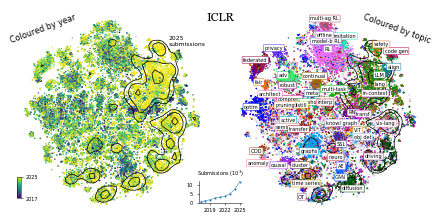

In [5]:
from sklearn.neighbors import KernelDensity

fig, axs = plt.subplots(ncols=2, figsize=(6.0, 3.0), layout="constrained")

axs[0].axis("equal")
np.random.seed(42)
reorder = np.random.permutation(Z.shape[0])
sc = axs[0].scatter(
    Z[reorder, 0], Z[reorder, 1], s=2, c=iclr.year[reorder], ec="none", rasterized=True
)

clf = KernelDensity(kernel="gaussian", bandwidth=5).fit(Z[iclr.year == 2025, :])
x = np.linspace(-100.0, 100.0)
y = np.linspace(-100.0, 100.0)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
ZZ = clf.score_samples(XX)
ZZ = ZZ.reshape(X.shape)
CS = axs[0].contour(
    X, Y, ZZ, levels=[-9.9, -9.5, -9], colors='k', linewidths=.75, linestyles='-',
)
axs[0].text(57, 67, '2025\nsubmissions', fontsize=6)

axs[0].axis("off")

axclb = plt.axes([0.03, 0.1, 0.008, 0.1])
cb = fig.colorbar(sc, cax=axclb, ticks=[2017, 2025])
cb.ax.tick_params(labelsize=7)
axclb.tick_params(axis='both', labelsize=5, width=.5, length=2)
for axis in ['top', 'bottom', 'left', 'right']:
    axclb.spines[axis].set_linewidth(.5)
cb.outline.set_linewidth(.5)

axs[1].axis("equal")
axs[1].scatter(
    Z[iclr.labels == "unlabeled", 0],
    Z[iclr.labels == "unlabeled", 1],
    s=2,
    c=label2color["unlabeled"],
    ec="none",
    rasterized=True,
)
axs[1].axis("off")

ind = iclr.labels != "unlabeled"
reorder = np.random.permutation(np.sum(ind))
axs[1].scatter(
    Z[ind, 0][reorder],
    Z[ind, 1][reorder],
    s=2,
    ec="none",
    c=[label2color[c] for c in iclr.labels.values[ind][reorder]],
    rasterized=True,
)

CS = axs[1].contour(
    X, Y, ZZ, levels=[-9.9, -9.5, -9], colors='k', linewidths=.75, linestyles='-',
)

for label in np.unique(iclr.labels.values):
    if label == "unlabeled":
        continue

    ind = label == iclr.labels.values
    if np.sum(ind) > 500:
        bw = 10
    else:
        bw = 2
    kde = KernelDensity(kernel="gaussian", bandwidth=bw).fit(Z[ind])
    log_density = kde.score_samples(Z[ind])
    mode = Z[ind][np.argmax(log_density)]
    mode += mode / np.linalg.norm(mode) * 7
    axs[1].text(
        mode[0],
        mode[1],
        label2abbr[label],
        ha="center",
        va="center",
        c="k",
        fontsize=5,
        bbox=dict(
            facecolor="w",
            alpha=1,
            edgecolor=label2color[label],
            boxstyle="round, pad=.2",
            linewidth=0.5,
        ),
    )

fig.text(0.01, 0.82, "Coloured by year", fontsize=8, rotation=20)
fig.text(0.99, 0.82, "Coloured by topic", fontsize=8, rotation=-20, ha="right")

ax = plt.axes([.45, .08, .1, .1])
years = np.arange(2017, 2026)
n_submissions = [np.sum(iclr.year==y) for y in years]
ax.plot(years, np.array(n_submissions) / 1000, '.-', lw=.5, markersize=2, clip_on=False)
ax.set_title('Submissions ($10^3$)', fontsize=5)
ax.set_ylim([0, 12])
ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(axis='both', labelsize=5, width=.5, length=2)
ax.set_yticks([0, 5, 10])
ax.set_xticks([2019, 2022, 2025])
for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(.5)
    
fig.text(0.5, 0.92, "ICLR", fontsize=12, ha="center", fontname="Georgia")

fig.savefig('../results/figures/iclr2025v2/embedding.png', dpi=300, facecolor="w")

In [6]:
n_submissions

[489, 1012, 1569, 2593, 3009, 3422, 4955, 7401, 11663]